In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data and EDA

In [115]:
df = pd.read_csv('creditcard.csv')

In [116]:
len(df)

284807

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [118]:
# df.isnull().sum()

In [119]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [120]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [121]:
# Dropping the time column
df.drop(['Time'], axis=1, inplace=True)

<Axes: xlabel='Class', ylabel='count'>

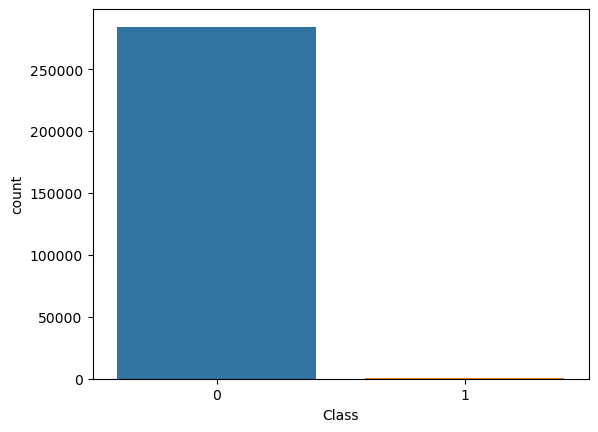

In [122]:
sns.countplot(data=df, x='Class') # highly imbalanced dataset

In [123]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [124]:
492/len(df)*100 # percent of fradulent transactions

0.1727485630620034

<Axes: >

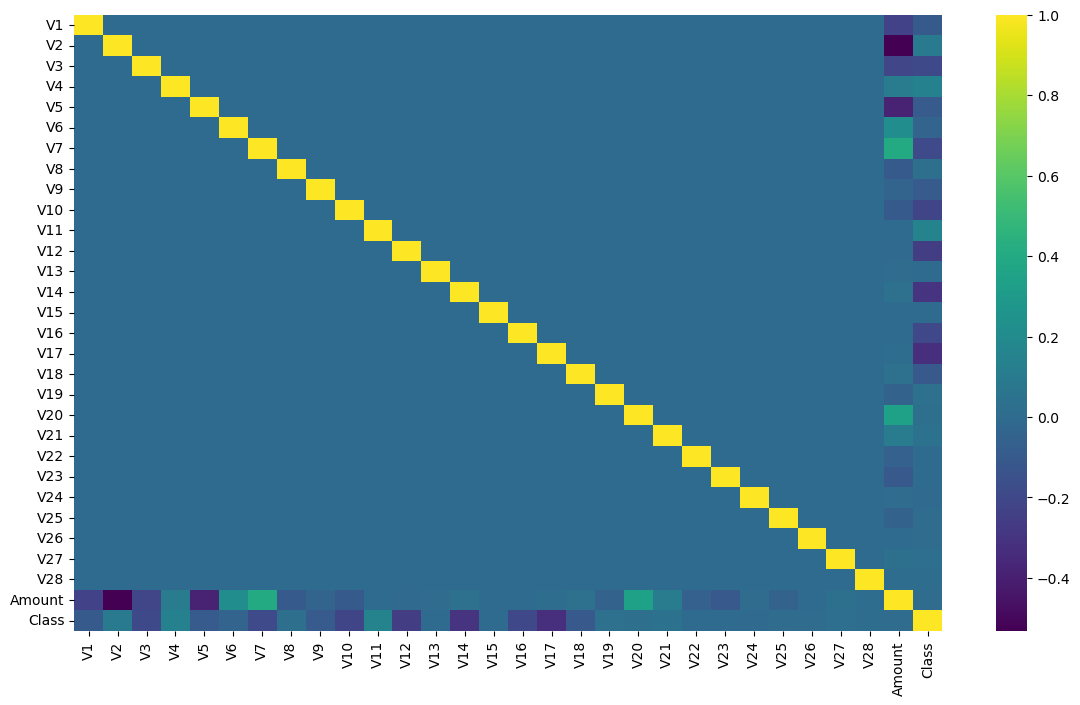

In [125]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), cmap='viridis')

In [126]:
df.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Some Observations

1. For class 1, all the other V_n features have a genericaly higher (absolute) values
2. For class 1, Amount has a genericaly higher value too

In [127]:
# sns.boxplot(data=df, x='Class', y='Time')

<Axes: xlabel='Class', ylabel='V15'>

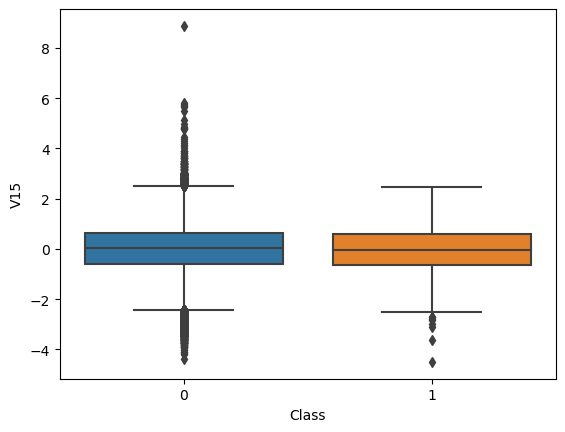

In [128]:
sns.boxplot(data=df, x='Class', y='V15')

In [129]:
df.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

<Axes: >

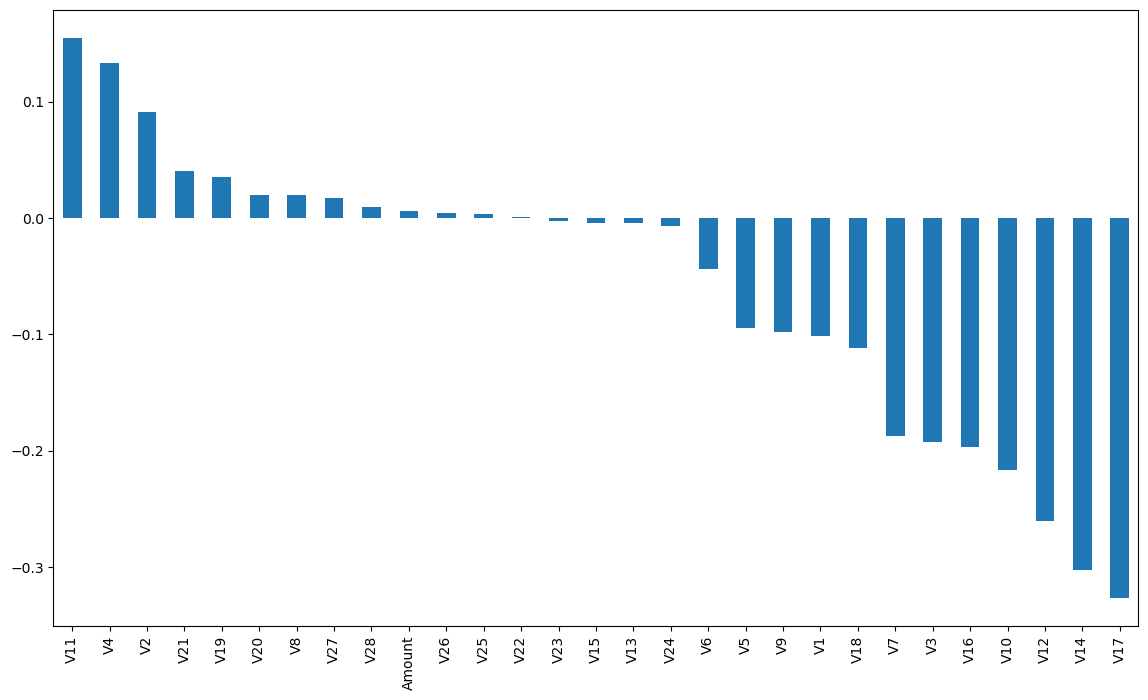

In [130]:
plt.figure(figsize=(14,8))
df.corr()['Class'].sort_values(ascending=False)[1:].plot(kind='bar')

#### Some of the most correlated features seem to be V17, V14, V12

<Axes: xlabel='V17', ylabel='V14'>

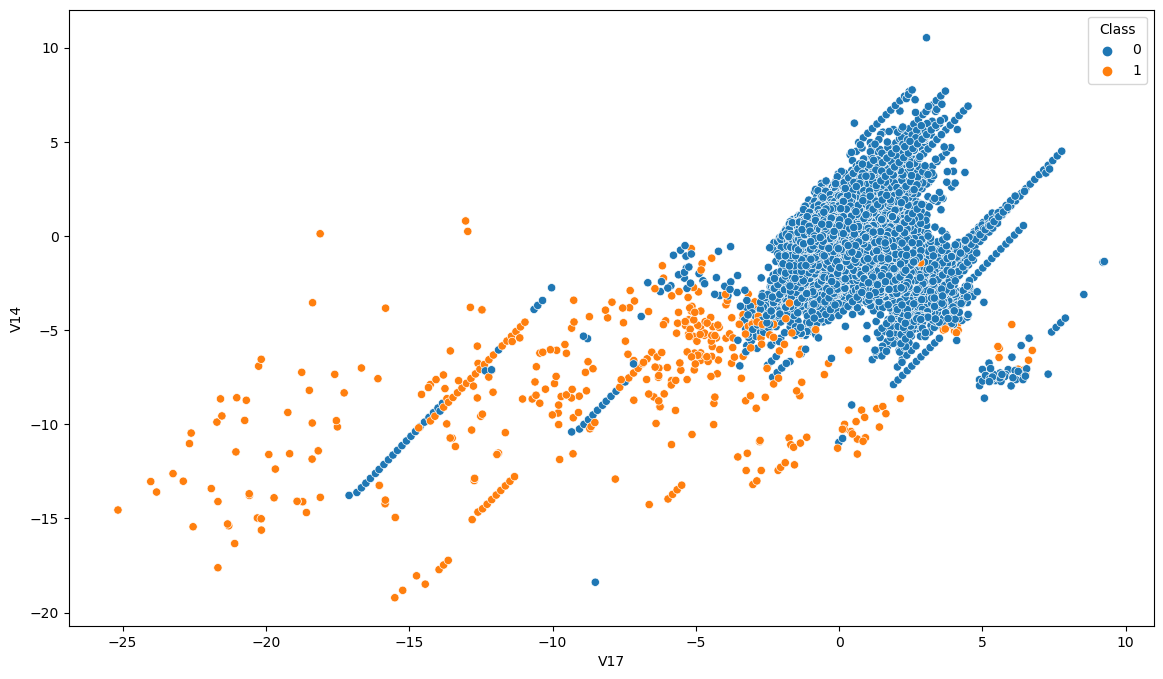

In [131]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=df, x='V17', y='V14', hue='Class')

# Data Preprocessing

### Train-Validation-Test split

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
# Train Test Split
# df broken into df_train_val (80%) and df_test (20%)
# df_train_val further broken into df_train (80%) and df_val (20%)

In [134]:
df_train_val, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Class'])

In [135]:
df_train, df_val = train_test_split(df_train_val, test_size=0.2, random_state=42, stratify=df_train_val['Class'])

In [136]:
X_train = df_train.drop('Class', axis=1).values
y_train = df_train['Class'].values

X_val = df_val.drop('Class', axis=1).values
y_val = df_val['Class'].values

X_test = df_test.drop('Class', axis=1).values
y_test = df_test['Class'].values

In [137]:
# Scaling the data

In [138]:
from sklearn.preprocessing import MinMaxScaler

In [139]:
scaler = MinMaxScaler()

In [140]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [148]:
# X_train
# y_train

# Building Models

1. Decision Tree

In [ ]:
from sklearn.